In [47]:
%matplotlib inline 
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from tqdm import tqdm_notebook as tqdm
sns.set()

In [48]:
df = pd.read_csv("raw_data.csv", sep=";")
df.head()

patient_name               cell_name cell_type patient_state   lambda_1  \
0     P2_ULC80  P2_ULC80_M1_L1_ROI1_C1         B        malade  86.256404   
1     P2_ULC80  P2_ULC80_M1_L1_ROI1_C1         B        malade  72.367814   
2     P2_ULC80  P2_ULC80_M1_L1_ROI1_C1         B        malade  36.107124   
3     P2_ULC80  P2_ULC80_M1_L1_ROI1_C2         B        malade  75.073652   
4     P2_ULC80  P2_ULC80_M1_L1_ROI1_C2         B        malade  51.591270   

    lambda_2   lambda_3   lambda_4   lambda_5   lambda_6  ...  lambda_991  \
0  84.116425  83.269485  73.725729  69.172432  58.695397  ...  345.330540   
1  70.946072  73.946121  69.342146  66.510280  51.961781  ...  329.497317   
2  50.509171  61.251275  60.634079  59.005082  43.374480  ...  349.773008   
3  57.880571  53.339291  47.543917  51.896103  40.910901  ...  316.498420   
4  54.161436  63.649577  58.364222  61.095665  47.811723  ...  324.027328   

   lambda_992  lambda_993  lambda_994  lambda_995  lambda_996  lambda_997  \
0  343.913899  340.570137  336.092245  329.088472  324.055107  314.110388   
1  330.293120  334.239066  336.958602  332.810752  337.041213  329.390541   
2  362.963878  377.543505  369.898047  347.525042  324.241500  304.862554   
3  323.193044  321.317859  310.282294  326.497336  339.002563  345.054206   
4  320.147621  318.339477  310.159782  313.315257  333.873758  339.270424   

   lambda_998  lambda_999  spectre  
0  319.853392  335.922163      3.0  
1  317.220241  289.615842      2.0  
2  313.958545  356.180451      1.0  
3  372.404114  414.603390      2.0  
4  352.541981  351.914705      1.0  

[5 rows x 1004 columns]

In [3]:
df.tail()

patient_name                 cell_name cell_type patient_state  \
7192    P1_ULC156  P1_ULC156_M1_L1_ROI2_C43       TNK          sain   
7193    P1_ULC156  P1_ULC156_M1_L1_ROI2_C43       TNK          sain   
7194    P1_ULC156  P1_ULC156_M1_L1_ROI2_C44         B          sain   
7195    P1_ULC156  P1_ULC156_M1_L1_ROI2_C44         B          sain   
7196    P1_ULC156  P1_ULC156_M1_L1_ROI2_C44         B          sain   

        lambda_1    lambda_2    lambda_3    lambda_4    lambda_5    lambda_6  \
7192   79.899533  106.561057  113.545793  116.775563  108.161449   96.394401   
7193   86.579106   64.318268   53.031208   60.351759   73.065302   72.644425   
7194   86.193622   67.082583   62.158704   66.058526   76.819090   76.931321   
7195   89.962557   89.573056   90.300399   93.353796   96.570792  104.798885   
7196  124.769615  131.251309  133.413285  133.087900  127.784360  120.944110   

      ...  lambda_991  lambda_992  lambda_993  lambda_994  lambda_995  \
7192  ...  353.242721  342.554395  338.234888  349.217179  354.196203   
7193  ...  336.118073  345.712805  338.797810  339.772543  345.702042   
7194  ...  340.361834  348.195007  342.144712  357.687618  361.788879   
7195  ...  370.213484  370.174949  373.407591  379.524429  382.040521   
7196  ...  381.837385  372.979719  362.569024  354.209187  365.131340   

      lambda_996  lambda_997  lambda_998  lambda_999  spectre  
7192  357.833444  369.658252  378.589869  394.833234      3.0  
7193  353.963123  356.027565  351.790370  342.570314      1.0  
7194  362.309974  358.883856  355.593313  357.331293      1.0  
7195  376.632795  377.164771  366.349519  363.434051      2.0  
7196  371.785675  386.872433  400.864853  418.533136      3.0  

[5 rows x 1004 columns]

En évaluant P(Cell_type, Patient_state) on peut en déduire que une celulle T aura plus de chance d'être associé à un patient sain 

Text(0.5, 1.0, 'Crosstable for patient_state and cell_type')

<Figure size 432x288 with 0 Axes>

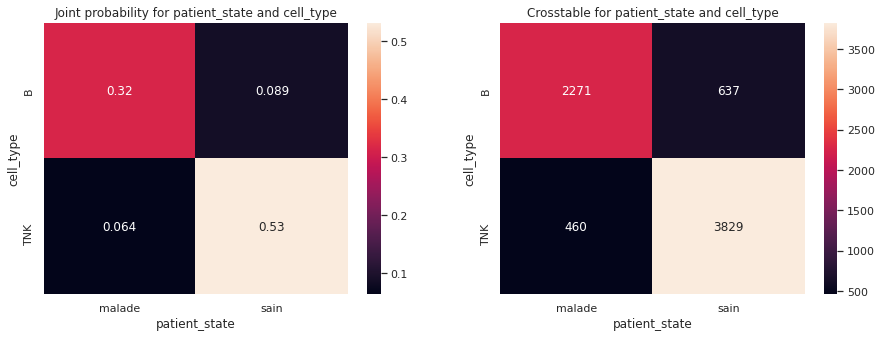

In [49]:
plt.tight_layout()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (15,5))
crosstab_ptable = pd.crosstab(df["cell_type"], df["patient_state"],normalize=True)
sns.heatmap(crosstab_ptable, annot=True, ax=ax1)
ax1.set_title('Joint probability for patient_state and cell_type')
sns.heatmap(pd.crosstab(df["cell_type"], df["patient_state"]), annot=True, ax=ax2, fmt='g')
ax2.set_title('Crosstable for patient_state and cell_type')


In [53]:
crosstab_ptable = pd.crosstab(df["cell_type"], df["patient_state"],normalize=True, margins=True)
print(crosstab_ptable)

patient_state    malade      sain       All
cell_type                                  
B              0.315548  0.088509  0.404057
TNK            0.063916  0.532027  0.595943
All            0.379464  0.620536  1.000000


In [5]:
des = df.describe()
des

lambda_1     lambda_2     lambda_3     lambda_4     lambda_5  \
count  7197.000000  7197.000000  7197.000000  7197.000000  7197.000000   
mean     60.124829    60.463136    59.888256    60.904055    63.627305   
std      19.976995    17.268393    17.920853    16.415824    13.919297   
min     -12.995530     8.440945     1.530354     5.717389    20.313871   
25%      46.904888    48.421237    47.690901    49.568899    54.488445   
50%      58.989268    59.228337    58.161755    58.895818    61.911697   
75%      71.682981    70.038529    69.733277    69.865094    70.779618   
max     154.161658   168.810197   167.825665   171.197853   160.204620   

          lambda_6     lambda_7     lambda_8     lambda_9    lambda_10  ...  \
count  7197.000000  7197.000000  7197.000000  7197.000000  7197.000000  ...   
mean     57.514653    65.687469    75.424163    91.773647   109.846895  ...   
std      17.249238    15.680804    15.217780    14.174618    14.109400  ...   
min      11.445971    14.353926    30.274836    47.596634    65.010792  ...   
25%      46.118824    54.751660    65.171660    82.026095   100.150733  ...   
50%      55.175128    64.270404    73.845304    90.814998   109.084369  ...   
75%      66.286946    74.490685    84.470709   100.256779   118.169825  ...   
max     165.600060   159.633693   158.330256   158.999332   170.533498  ...   

        lambda_991   lambda_992   lambda_993   lambda_994   lambda_995  \
count  7197.000000  7197.000000  7197.000000  7197.000000  7197.000000   
mean    329.839983   334.002681   332.861314   335.071753   336.623990   
std      27.831428    27.430182    27.728478    27.978240    28.926671   
min     200.871285   185.342734   179.166929   181.075762   171.396883   
25%     316.236211   321.961672   320.887548   322.333581   323.538601   
50%     335.135554   339.762888   338.850255   341.245106   342.813211   
75%     348.943557   352.548370   351.567056   354.435843   357.432078   
max     406.445658   401.881794   408.206418   415.210829   414.584479   

        lambda_996   lambda_997   lambda_998   lambda_999      spectre  
count  7197.000000  7197.000000  7197.000000  7197.000000  7197.000000  
mean    339.733173   339.436016   339.784133   341.260542     1.950118  
std      29.264895    31.442279    31.467506    36.484886     0.813236  
min     180.273545   175.537804   189.114613   162.011435     1.000000  
25%     327.182426   323.778776   325.371976   324.208602     1.000000  
50%     346.884805   345.883146   346.401326   346.924912     2.000000  
75%     360.816672   362.636769   361.816652   365.543180     3.000000  
max     423.749905   434.973547   423.668719   445.906239     3.000000  

[8 rows x 1000 columns]

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X_train)

df_subset = pd.DataFrame(columns = ['tsne-2d-one', 'tsne-2d-two','label']) 
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['label'] = y_train
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full")


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

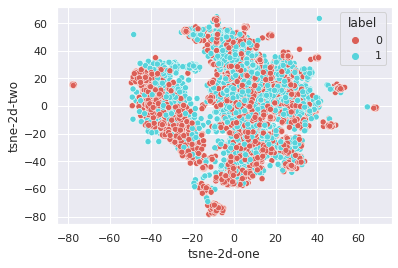

In [141]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full")


# GOOD SNR pas de deformation du spectre les étapes de prepreocessing sont de bonnes qualités pas de spikes pas besoin de signal processing bas niveau supplémentaire

In [6]:
import random
import plotly.graph_objects as go

n_sample = 15
fig = go.Figure()

samples,_ = get_data(df, random.sample(range(0, df.shape[0]), n_sample))
for i, sample in enumerate(samples):
    fig.add_trace(go.Scatter(x=list(range(999)), y=sample))
       
fig.show()

In [41]:
import itertools
fig = go.Figure()
save = []
df_b_malade = df.loc[(df["cell_type"] == "B") & (df["patient_state"] == "malade")]
df_b_sain = df.loc[(df["cell_type"] == "B") & (df["patient_state"] == "sain")]
df_tnk_sain = df.loc[(df["cell_type"] == "TNK") & (df["patient_state"] == "sain")]
df_tnk_malade = df.loc[(df["cell_type"] == "TNK") & (df["patient_state"] == "malade")]

#print(df_tnk_malade.shape,df_tnk_sain.shape,df_b_sain.shape,df_b_malade.shape) 

for dataframe, key in zip([df_tnk_malade,df_tnk_sain,df_b_sain,df_b_malade],["df_tnk_malade","df_tnk_sain","df_b_sain","df_b_malade"]):
    
    X, _ = get_data(df, list(range(len(dataframe))))
    X = X.mean(axis = 0)
    save.append({key:X})
    fig.add_trace(go.Scatter(x=list(range(999)), y=X))

combinations = itertools.combinations(save, 2)
print(combination[0].keys())

for combination in combinations:
    print("Correlation for {} and {}".format(combination[0].keys(),combination[1].keys()))
    print(np.correlate(combination[0].get(), combination[1].values()))

fig.show()


dict_keys(['df_tnk_malade'])
Correlation for dict_keys(['df_tnk_malade']) and dict_keys(['df_tnk_sain'])


TypeError: get expected at least 1 argument, got 0

/home/adrien/miniconda3/envs/quinten/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/adrien/miniconda3/envs/quinten/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='std'>

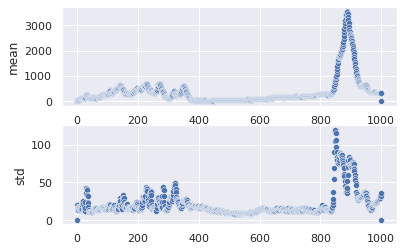

In [247]:
fig, (ax1,ax2) = plt.subplots(2)
sns.scatterplot(range(1001), des.iloc[1],ax=ax1)
sns.scatterplot(range(1001), des.iloc[2],ax=ax2)

In [65]:
df["cell_type"].value_counts()

TNK    4289
B      2908
Name: cell_type, dtype: int64

<AxesSubplot:xlabel='spectre', ylabel='Count'>

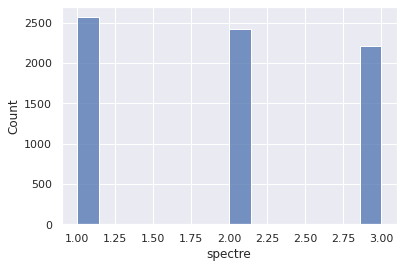

In [129]:
sns.histplot(data=df, x="spectre")


In [57]:
import plotly.graph_objects as go
import numpy as np


print(np.random.randint(7, size=100).shape)
fig = go.Figure(go.Histogram(data=df
    x=patient_name),
    bingroup=1)

#fig.add_trace(go.Histogram(
#    x=np.random.randint(7, size=20),
#    bingroup=1))

fig.update_layout(
    barmode="overlay",
    bargap=0.1)

fig.show()


df.select_dtypes(exclude=np.number).columns

SyntaxError: invalid syntax (<ipython-input-57-6a536a98ac1d>, line 7)

patient_name
cell_name
cell_type
patient_state


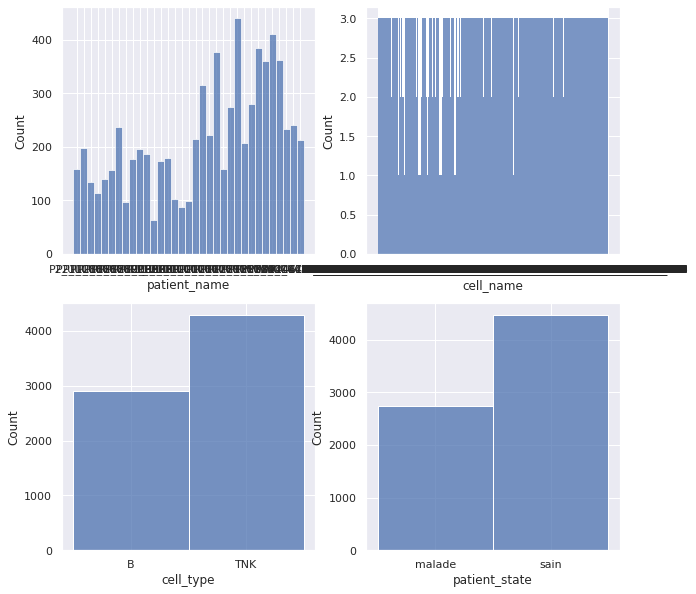

In [36]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

for ax, element in zip(axes.flat, df.select_dtypes(exclude=np.number).columns):
    print(element)
    sns.histplot(data=df, x=element, ax=ax)

plt.show()

## Feature selection

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [43]:
df = pd.get_dummies(df, columns=['cell_type'])
df["patient_state"] = df['patient_state'].map({'malade':1,'sain':0})


(array([0, 1]), array([447, 273]))


/home/adrien/miniconda3/envs/quinten/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



(array([0, 1]), array([447, 273]))


/home/adrien/miniconda3/envs/quinten/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.83      0.86      0.85       894
           1       0.76      0.72      0.74       546

    accuracy                           0.81      1440
   macro avg       0.80      0.79      0.79      1440
weighted avg       0.80      0.81      0.80      1440

[[769 125]
 [155 391]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       894
           1       0.74      0.53      0.62       546

    accuracy                           0.75      1440
   macro avg       0.75      0.71      0.72      1440
weighted avg       0.75      0.75      0.74      1440

[[792 102]
 [256 290]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       894
           1       0.87      0.82      0.84       546

    accuracy                           0.88      1440
   macro avg       0.88      0.87      0.88      1440
weighted avg       0.88     

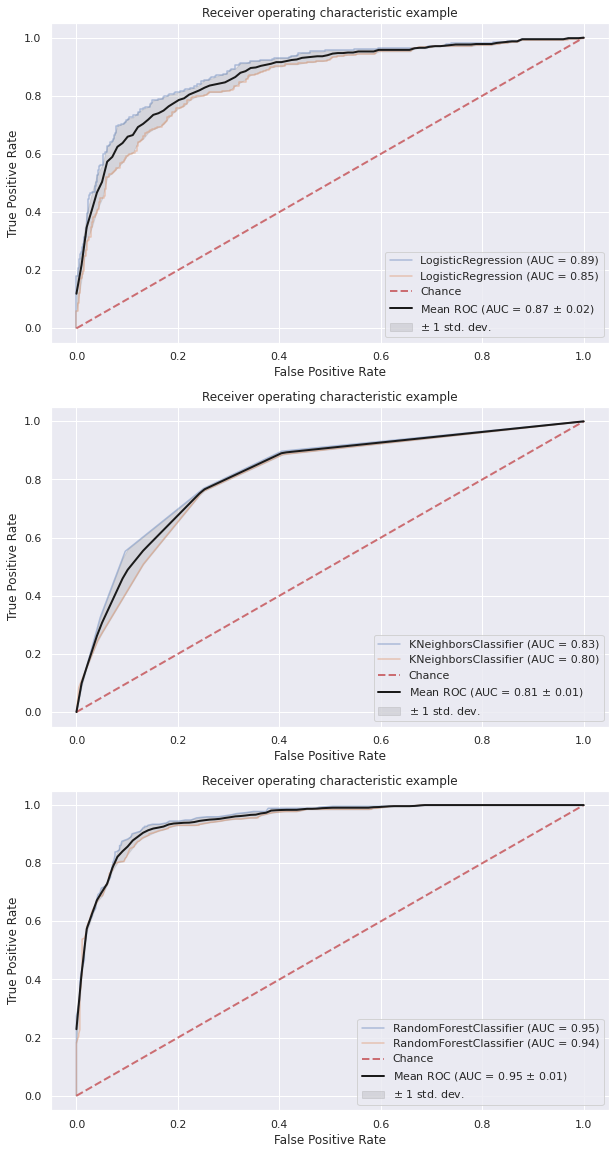

In [45]:



#TODO Check the stratify, ADD unit test to check data distrib

def get_data(df1, row=[], col=["patient_state","spectre","patient_name","cell_name"]):
    #TODO deal with cell type
    
    "Return selected row data in numpy format"
    df2 = df1.copy()   
    df2 = df2.drop(col, axis=1)   
    X = df2.select_dtypes(include=np.number).iloc[row, :].to_numpy() #exclude spectrum index

    y = df1["patient_state"].iloc[row].to_numpy()
    return X, y

def split_train_val_test(df, test_size=0.2):
    "Split in train test validation set given some percentage"
    
    train, test = train_test_split(df, test_size=test_size)
    train, val = train_test_split(train, test_size=0.2)

    return train, val, test

def standardize(X_train, X_test, X_val=None):
    
    scaler_train = StandardScaler() 
    scaler_test = StandardScaler() 
    X_val_normalized = None 
    
    if X_val is not None:
        scaler_val = StandardScaler() 
        X_val_normalized = scaler_val.fit_transform(X_val)
        
    ####
    #Test here make sure mean var are closed 
    ####
    return scaler_train.fit_transform(X_train), scaler_train.fit_transform(X_test), X_val_normalized

def train(X_train, y_train, model):
    
    return model.fit(X_train, y_train)

    
def test(X_test, y_test, model):
    
    return model.score(X_test, y_test)


#TODO FACTORIZE TO HAVE A USABLE TRAIN TEST FUNC WITH JUST(Xtrain, ytreain, xtest ytest)

def train_test(X_train, y_train, X_test, y_test, clf, ax, return_prediction=0):
    mean_fpr = np.linspace(0, 1, 100)
    y_predict = None 
    train(X_train, y_train, clf)
    score = test(X_test, y_test, clf)
    if return_prediction:
        y_predict = clf.predict(X_test)
    viz = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=.4)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)

    
    return score, interp_tpr, viz.roc_auc ,y_predict  

def plot_roc(ax, tprs, aucs):
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='k',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=1)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    

def multi_train(df):
    #remap label
    seed = 42
    n_splits = 2
    fig, axes = plt.subplots(3, figsize=(10,20))
    dict_clfs = {"LR": [[],[],[],0],"KNN":[[],[],[],0],"RF": [[],[],[],0]} # MAKE an object for that
    sss = StratifiedShuffleSplit(n_splits=n_splits, random_state=seed)
    label= []

    for train_index, test_index in sss.split(df.loc[:, df.columns != 'patient_state'], df["patient_state"]):
        
        clf_dict = {"LR": LogisticRegression(random_state=0, max_iter=500),
                    "KNN": KNeighborsClassifier(metric="cosine"),
                    "RF": RandomForestClassifier()}
        X_train, y_train = get_data(df, train_index)
        X_test, y_test = get_data(df, test_index)
        print(np.unique(y_test , return_counts=True))

        for i, (key, clf) in enumerate(clf_dict.items()): 

            split_score, tpr, auc, y_pred = train_test(X_train, y_train, X_test, y_test, clf, axes[i], return_prediction=True)
            dict_clfs[key][0].append(tpr)
            dict_clfs[key][1].append(auc)
            dict_clfs[key][2].extend(y_pred)
            dict_clfs[key][3] += split_score
        
        label.extend(y_test)
        
    for ax, i  in zip(axes, dict_clfs):
        plot_roc(ax, dict_clfs[i][0], dict_clfs[i][1])
        print(classification_report(label, dict_clfs[i][2]))
        print(confusion_matrix(label, dict_clfs[i][2]))

    #[print("Score is {0}".format(score/n_splits)) for score in score_dict.values()]
    
    
    
    return X_train, y_train, X_test, y_test, clf_dict
        
    
class TrainingScenario:
    def __init__(self, config, df):
        self.df = df 
        self.config = config


X_train, y_train, X_test, y_test, clf = multi_train(df)




## Feature selection 

(6477, 250) (720, 250)


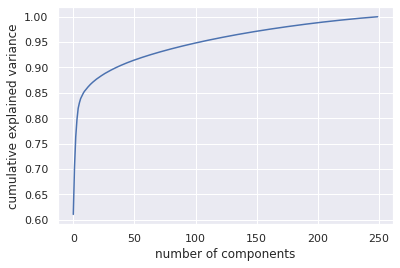

In [68]:
from sklearn.decomposition import PCA

n_components = 250

pca = PCA(n_components).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

sns.lineplot(x=range(n_components), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(X_train.shape, X_test.shape)

In [47]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

## Dataset balancement


In [38]:
df

patient_name                 cell_name  patient_state    lambda_1  \
0        P2_ULC80    P2_ULC80_M1_L1_ROI1_C1              1   86.256404   
1        P2_ULC80    P2_ULC80_M1_L1_ROI1_C1              1   72.367814   
2        P2_ULC80    P2_ULC80_M1_L1_ROI1_C1              1   36.107124   
3        P2_ULC80    P2_ULC80_M1_L1_ROI1_C2              1   75.073652   
4        P2_ULC80    P2_ULC80_M1_L1_ROI1_C2              1   51.591270   
...           ...                       ...            ...         ...   
7192    P1_ULC156  P1_ULC156_M1_L1_ROI2_C43              0   79.899533   
7193    P1_ULC156  P1_ULC156_M1_L1_ROI2_C43              0   86.579106   
7194    P1_ULC156  P1_ULC156_M1_L1_ROI2_C44              0   86.193622   
7195    P1_ULC156  P1_ULC156_M1_L1_ROI2_C44              0   89.962557   
7196    P1_ULC156  P1_ULC156_M1_L1_ROI2_C44              0  124.769615   

        lambda_2    lambda_3    lambda_4    lambda_5    lambda_6    lambda_7  \
0      84.116425   83.269485   73.725729   69.172432   58.695397   52.119610   
1      70.946072   73.946121   69.342146   66.510280   51.961781   58.639653   
2      50.509171   61.251275   60.634079   59.005082   43.374480   61.320470   
3      57.880571   53.339291   47.543917   51.896103   40.910901   53.734999   
4      54.161436   63.649577   58.364222   61.095665   47.811723   62.009418   
...          ...         ...         ...         ...         ...         ...   
7192  106.561057  113.545793  116.775563  108.161449   96.394401   99.913804   
7193   64.318268   53.031208   60.351759   73.065302   72.644425   90.110192   
7194   67.082583   62.158704   66.058526   76.819090   76.931321   94.071141   
7195   89.573056   90.300399   93.353796   96.570792  104.798885  111.831459   
7196  131.251309  133.413285  133.087900  127.784360  120.944110  131.102266   

      ...  lambda_993  lambda_994  lambda_995  lambda_996  lambda_997  \
0     ...  340.570137  336.092245  329.088472  324.055107  314.110388   
1     ...  334.239066  336.958602  332.810752  337.041213  329.390541   
2     ...  377.543505  369.898047  347.525042  324.241500  304.862554   
3     ...  321.317859  310.282294  326.497336  339.002563  345.054206   
4     ...  318.339477  310.159782  313.315257  333.873758  339.270424   
...   ...         ...         ...         ...         ...         ...   
7192  ...  338.234888  349.217179  354.196203  357.833444  369.658252   
7193  ...  338.797810  339.772543  345.702042  353.963123  356.027565   
7194  ...  342.144712  357.687618  361.788879  362.309974  358.883856   
7195  ...  373.407591  379.524429  382.040521  376.632795  377.164771   
7196  ...  362.569024  354.209187  365.131340  371.785675  386.872433   

      lambda_998  lambda_999  spectre  cell_type_B  cell_type_TNK  
0     319.853392  335.922163      3.0            1              0  
1     317.220241  289.615842      2.0            1              0  
2     313.958545  356.180451      1.0            1              0  
3     372.404114  414.603390      2.0            1              0  
4     352.541981  351.914705      1.0            1              0  
...          ...         ...      ...          ...            ...  
7192  378.589869  394.833234      3.0            0              1  
7193  351.790370  342.570314      1.0            0              1  
7194  355.593313  357.331293      1.0            1              0  
7195  366.349519  363.434051      2.0            1              0  
7196  400.864853  418.533136      3.0            1              0  

[7197 rows x 1005 columns]

## Explainability

In [42]:
a = df.select_dtypes(include=np.number).copy()
a = a.drop(["patient_state","spectre"], axis=1)
a.columns

Index(['lambda_1', 'lambda_2', 'lambda_3', 'lambda_4', 'lambda_5', 'lambda_6',
       'lambda_7', 'lambda_8', 'lambda_9', 'lambda_10',
       ...
       'lambda_992', 'lambda_993', 'lambda_994', 'lambda_995', 'lambda_996',
       'lambda_997', 'lambda_998', 'lambda_999', 'cell_type_B',
       'cell_type_TNK'],
      dtype='object', length=1001)

In [29]:
import eli5

In [39]:
from eli5.sklearn import PermutationImportance
print(X_test.shape)
perm = PermutationImportance(clf["RF"], random_state=1).fit(X_test, y_test)


(720, 1001)


ValueError: feature_names has a wrong length: expected=1001, got=1003

In [43]:
eli5.show_weights(perm, feature_names = a.columns.tolist())